In [436]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/two-sigma-connect-rental-listing-inquiries/test.json.zip
/kaggle/input/two-sigma-connect-rental-listing-inquiries/images_sample.zip
/kaggle/input/two-sigma-connect-rental-listing-inquiries/sample_submission.csv.zip
/kaggle/input/two-sigma-connect-rental-listing-inquiries/train.json.zip
/kaggle/input/two-sigma-connect-rental-listing-inquiries/Kaggle-renthop.torrent


# 부동산 관련 분류문제
사람들이 얼마나 클릭할까, 흥미를 가질까 => 흥미 레벨(interest_level)을 분류한다. 

In [444]:
train = pd.read_json("/kaggle/input/two-sigma-connect-rental-listing-inquiries/train.json.zip")
train["created"] = pd.to_datetime(train["created"])
train["month"] = train["created"].dt.month
train["day"] = train["created"].dt.day

train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,month,day
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium,6,16
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low,6,1
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium,6,14
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium,6,24
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low,6,28


# 탐색적 데이터 분석

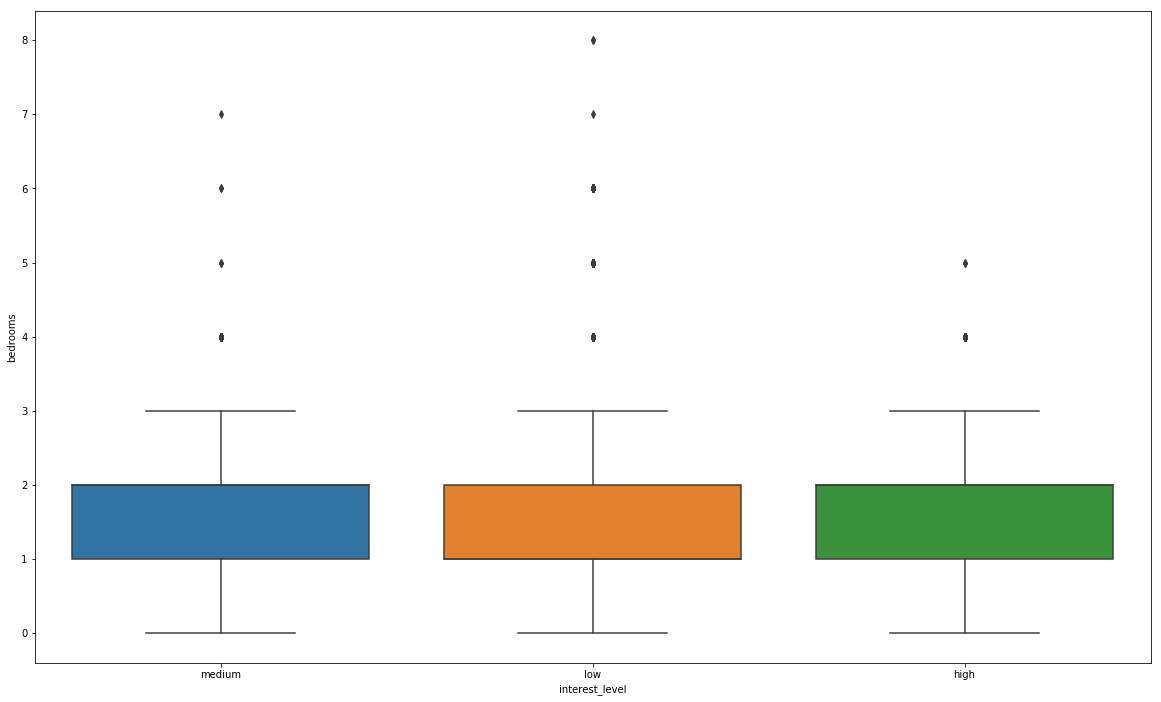

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,12))
sns.boxplot(train["interest_level"],train["bedrooms"]) 

# box의 차이가 없다 (각 box의 높이,길이)
# countplot으로 다시 확인

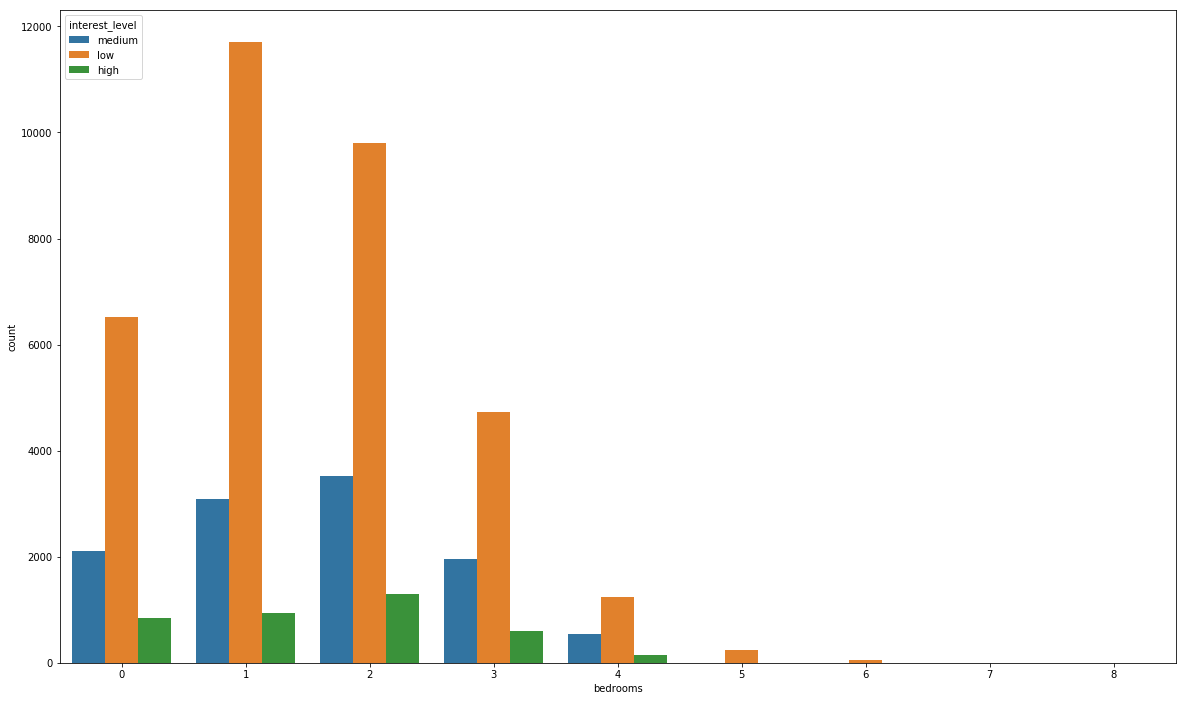

In [439]:
plt.figure(figsize=(20,12))
sns.countplot(train["bedrooms"], hue = train["interest_level"]) 

# bedroom이 1에서 2로 증가할때, low감소 -> 즉, 흥미 증가를 알 수 있다

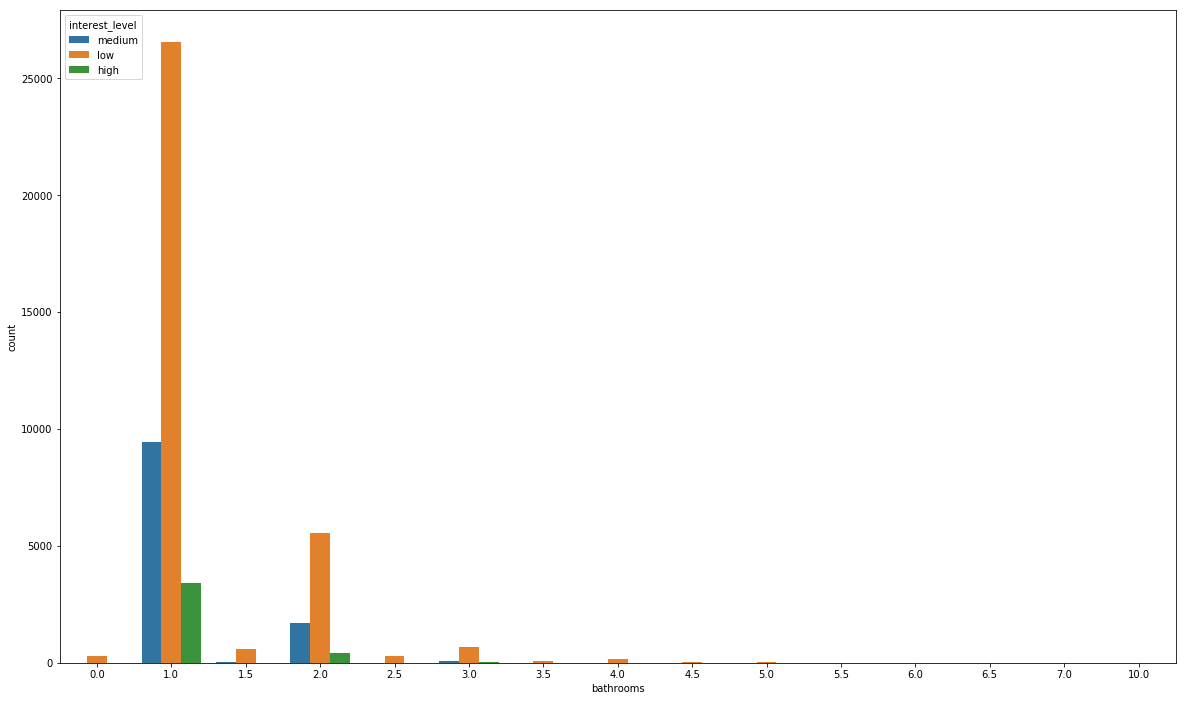

In [448]:
plt.figure(figsize=(20,12))
sns.countplot(train["bathrooms"], hue = train["interest_level"]) 

# 욕실은 1~2개가 적정선

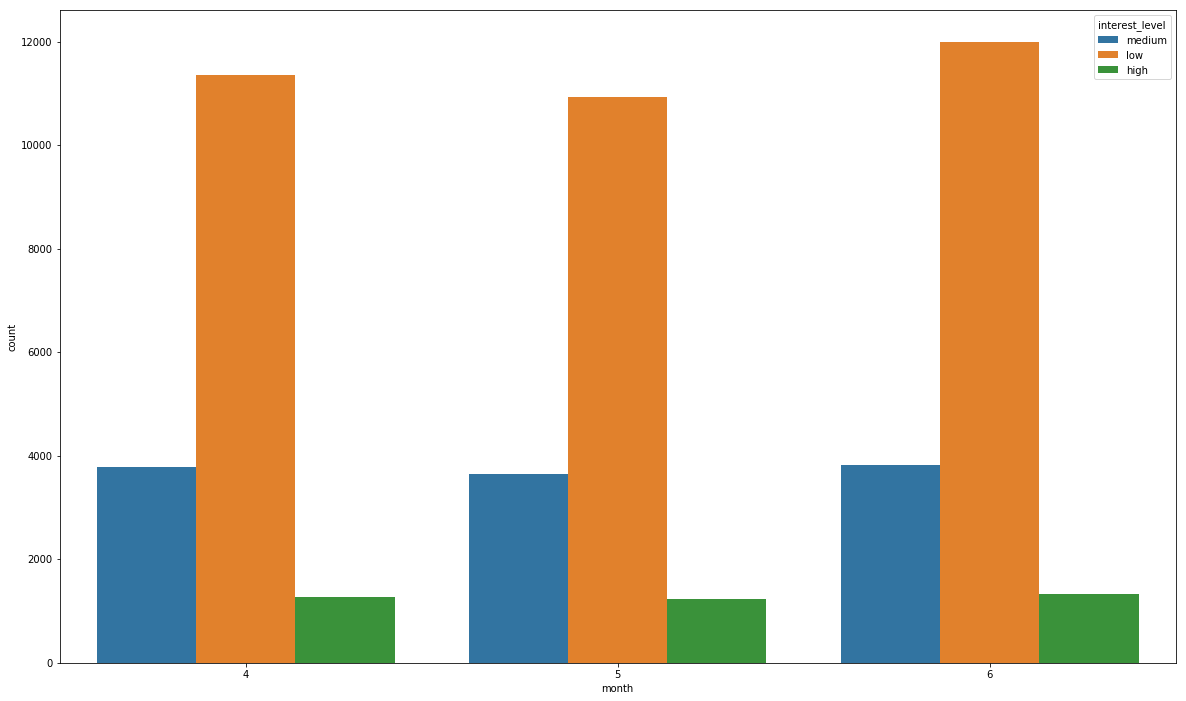

In [447]:
plt.figure(figsize=(20,12))
sns.countplot(train["month"], hue = train["interest_level"])  

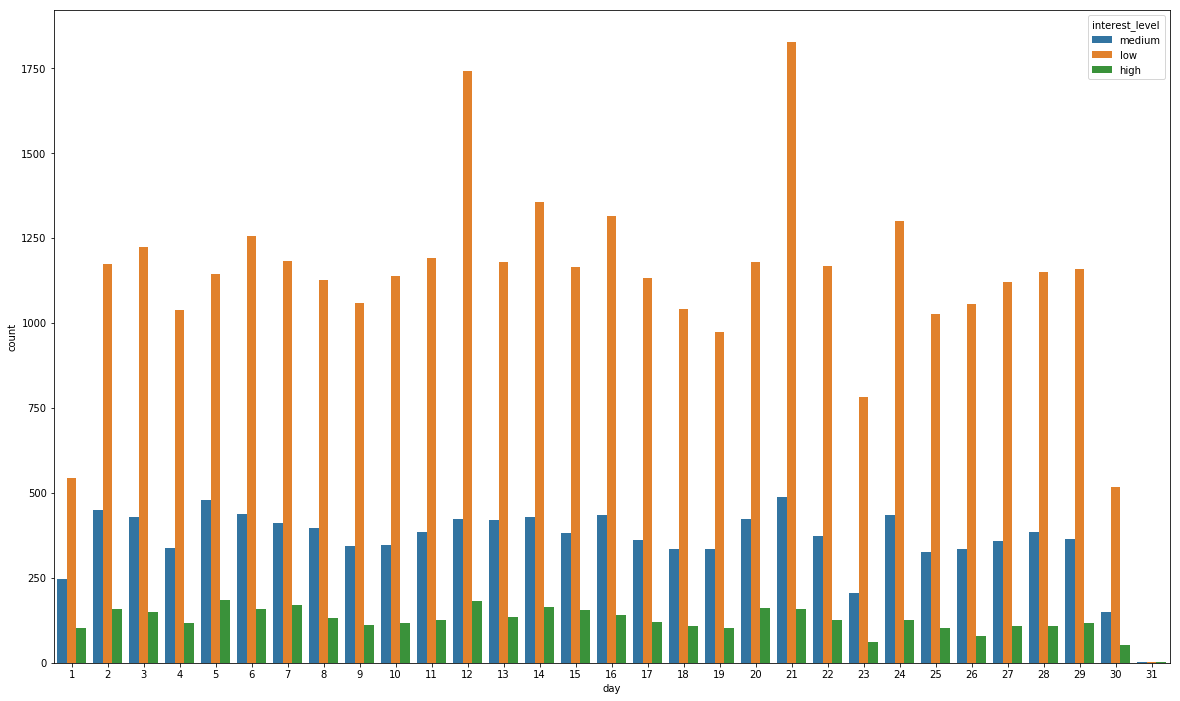

In [441]:
plt.figure(figsize=(20,12))
sns.countplot(train["day"], hue = train["interest_level"])  

# 각 날짜별 세부 흥미수준

# 2~3일 : 흥미증가
# 11~12일 : 흥미 크게 감소 ...

# 데이터 전처리

In [426]:
pd.options.display.max_columns = 40

train = pd.read_json("/kaggle/input/two-sigma-connect-rental-listing-inquiries/train.json.zip")
test = pd.read_json("/kaggle/input/two-sigma-connect-rental-listing-inquiries/test.json.zip")

alldata = pd.concat([train,test], sort=False)

alldata["created"] = pd.to_datetime(alldata["created"])
#alldata["year"] = alldata["created"].dt.year # 도움안됨
alldata["month"] = alldata["created"].dt.month 
alldata["day"] = alldata["created"].dt.day
alldata["week"] = alldata["created"].dt.week 
alldata["hour"] = alldata["created"].dt.hour 
alldata["weekday"] = alldata["created"].dt.weekday
alldata["min"] = alldata["created"].dt.minute
alldata["sec"] = alldata["created"].dt.second

alldata = alldata.drop(["created"], axis=1)

alldata.head()

,bathrooms,bedrooms,building_id,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,month,day,week,hour,weekday,min,sec
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium,6,16,24,5,3,55,27
6,1.0,2,b8e75fc949a6cd8225b455648a951712,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low,6,1,22,5,2,44,33
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium,6,14,24,15,1,19,59
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium,6,24,25,7,4,54,24
15,1.0,0,bfb9405149bfff42a92980b594c28234,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low,6,28,26,3,1,50,23


In [427]:
# 문자열로 이루어진 columns를 숫자로 맵핑하기

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

alldata["building_id"] = le.fit_transform(alldata["building_id"])
alldata["display_address"] = le.fit_transform(alldata["display_address"])
alldata["street_address"] = le.fit_transform(alldata["street_address"])
alldata["manager_id"] = le.fit_transform(alldata["manager_id"])

# 주의점
# description, features 칼럼은 각각의 단어의 의미가 중요하고,
# photos 칼럼은 사진의 주소들이 표시되어있어서,
# Label Encoding으로 맵핑하는것은 전처리하기에 좋지 않다

alldata.head()

,bathrooms,bedrooms,building_id,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,month,day,week,hour,weekday,min,sec
4,1.0,1,6083,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,1887,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,2767,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,3343,medium,6,16,24,5,3,55,27
6,1.0,2,8417,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,10848,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,2565,[https://photos.renthop.com/2/7092344_7663c19a...,3800,9008,low,6,1,22,5,2,44,33
9,1.0,2,9344,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,10904,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,3458,[https://photos.renthop.com/2/7158677_c897a134...,3495,16634,medium,6,14,24,15,1,19,59
10,1.5,3,3797,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,12282,[],40.7145,7211212,-73.9425,1568,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,23484,medium,6,24,25,7,4,54,24
15,1.0,0,8717,Over-sized Studio w abundant closets. Availabl...,10791,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,790,[https://photos.renthop.com/2/7225292_901f1984...,2795,14705,low,6,28,26,3,1,50,23


# 통계형 칼럼추가

In [428]:
alldata["n_photo"] = alldata["photos"].apply(len)        # 각 사진의 개수

alldata["n_features"] = alldata["features"].apply(len)   # 각 건물특징의 개수

alldata["n_description"] = alldata["description"].apply(lambda x : len(x.split())) # 단어의 갯수
# 하나의 문자열이면 str.split()으로 되지만, 행 당 여러개list가 있으므로 apply로 모두에게 접근해서 각각해줘야한다.

alldata.head()

,bathrooms,bedrooms,building_id,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,month,day,week,hour,weekday,min,sec,n_photo,n_features,n_description
4,1.0,1,6083,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,1887,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,2767,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,3343,medium,6,16,24,5,3,55,27,12,7,75
6,1.0,2,8417,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,10848,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,2565,[https://photos.renthop.com/2/7092344_7663c19a...,3800,9008,low,6,1,22,5,2,44,33,6,6,129
9,1.0,2,9344,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,10904,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,3458,[https://photos.renthop.com/2/7158677_c897a134...,3495,16634,medium,6,14,24,15,1,19,59,6,6,117
10,1.5,3,3797,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,12282,[],40.7145,7211212,-73.9425,1568,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,23484,medium,6,24,25,7,4,54,24,5,0,93
15,1.0,0,8717,Over-sized Studio w abundant closets. Availabl...,10791,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,790,[https://photos.renthop.com/2/7225292_901f1984...,2795,14705,low,6,28,26,3,1,50,23,4,4,39


In [429]:
# 각 manager에 따른 영향
manager_aff = alldata.groupby("manager_id")["price","bedrooms","bathrooms","latitude","longitude","listing_id"].agg(["count","mean","max","min","std","median"]).reset_index()
alldata = pd.merge(alldata,manager_aff,on="manager_id",how="left")

/opt/conda/lib/python3.6/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [430]:
alldata.head()

,bathrooms,bedrooms,building_id,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,month,day,week,hour,weekday,min,...,"(bathrooms, std)","(bathrooms, median)","(latitude, count)","(latitude, mean)","(latitude, max)","(latitude, min)","(latitude, std)","(latitude, median)","(longitude, count)","(longitude, mean)","(longitude, max)","(longitude, min)","(longitude, std)","(longitude, median)","(listing_id, count)","(listing_id, mean)","(listing_id, max)","(listing_id, min)","(listing_id, std)","(listing_id, median)"
0,1.0,1,6083,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,1887,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,2767,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,3343,medium,6,16,24,5,3,55,...,0.256467,1.0,294,40.708596,40.7679,40.5758,0.050420,40.7113,294,-73.909704,-73.8148,-73.9580,0.040430,-73.91710,294,7.015895e+06,7233385,6813855,116832.612163,7002849.0
1,1.0,2,8417,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,10848,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,2565,[https://photos.renthop.com/2/7092344_7663c19a...,3800,9008,low,6,1,22,5,2,44,...,0.417559,1.0,64,40.749678,40.7963,40.7056,0.022122,40.7513,64,-73.984056,-73.9464,-74.0162,0.017909,-73.98855,64,7.019886e+06,7395263,6834099,116566.526392,7021059.5
2,1.0,2,9344,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,10904,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,3458,[https://photos.renthop.com/2/7158677_c897a134...,3495,16634,medium,6,14,24,15,1,19,...,0.383115,1.0,265,40.752762,40.7884,40.7156,0.014087,40.7528,265,-73.975012,-73.9449,-74.0059,0.011957,-73.97570,265,7.023368e+06,7227235,6815525,120485.954758,7024921.0
3,1.5,3,3797,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,12282,[],40.7145,7211212,-73.9425,1568,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,23484,medium,6,24,25,7,4,54,...,0.305508,1.0,235,40.701596,40.8502,40.6455,0.025991,40.6989,235,-73.950168,-73.8525,-73.9917,0.022847,-73.95320,235,7.031767e+06,7226750,6814711,125976.544428,7050454.0
4,1.0,0,8717,Over-sized Studio w abundant closets. Availabl...,10791,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,790,[https://photos.renthop.com/2/7225292_901f1984...,2795,14705,low,6,28,26,3,1,50,...,0.170195,1.0,135,40.719136,40.8063,40.6824,0.027213,40.7084,135,-73.990982,-73.9449,-74.0180,0.020676,-73.99580,135,7.047819e+06,7225413,6829493,124205.152522,7025465.0


# 추가한 칼럼에 대한 시각화

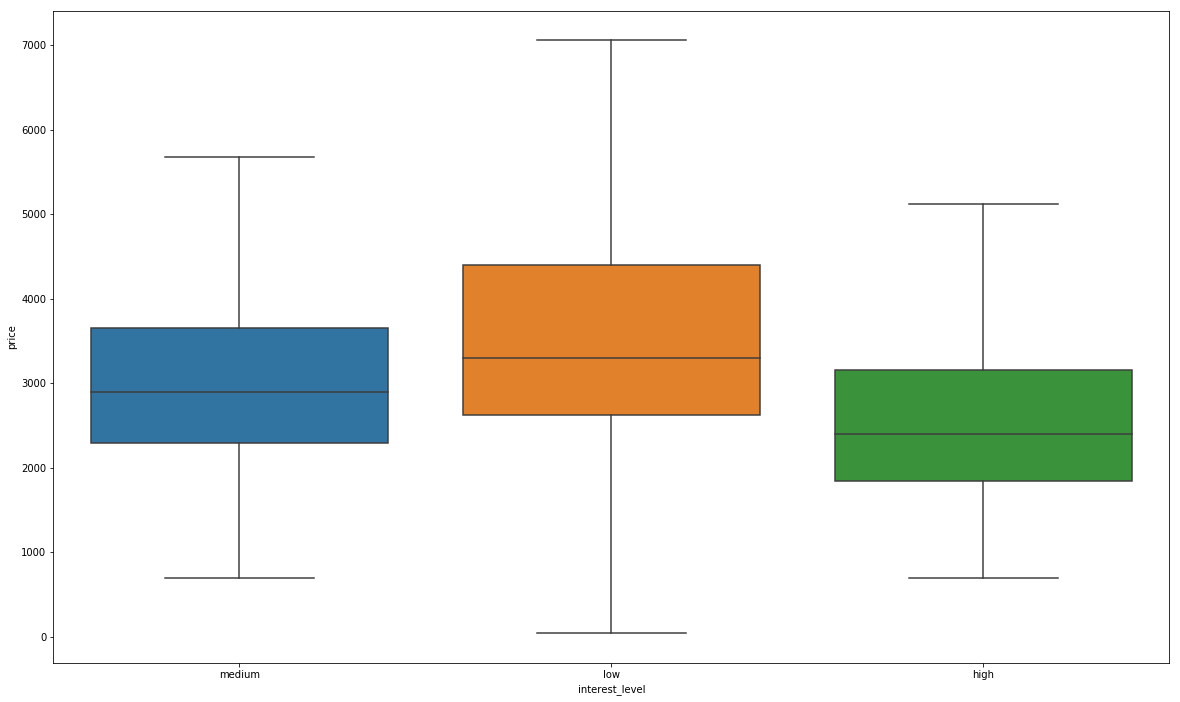

In [434]:
# 가격에 따른 흥미

plt.figure(figsize=(20,12))
sns.boxplot(alldata["interest_level"],alldata["price"], showfliers = False) # 이상치 제거

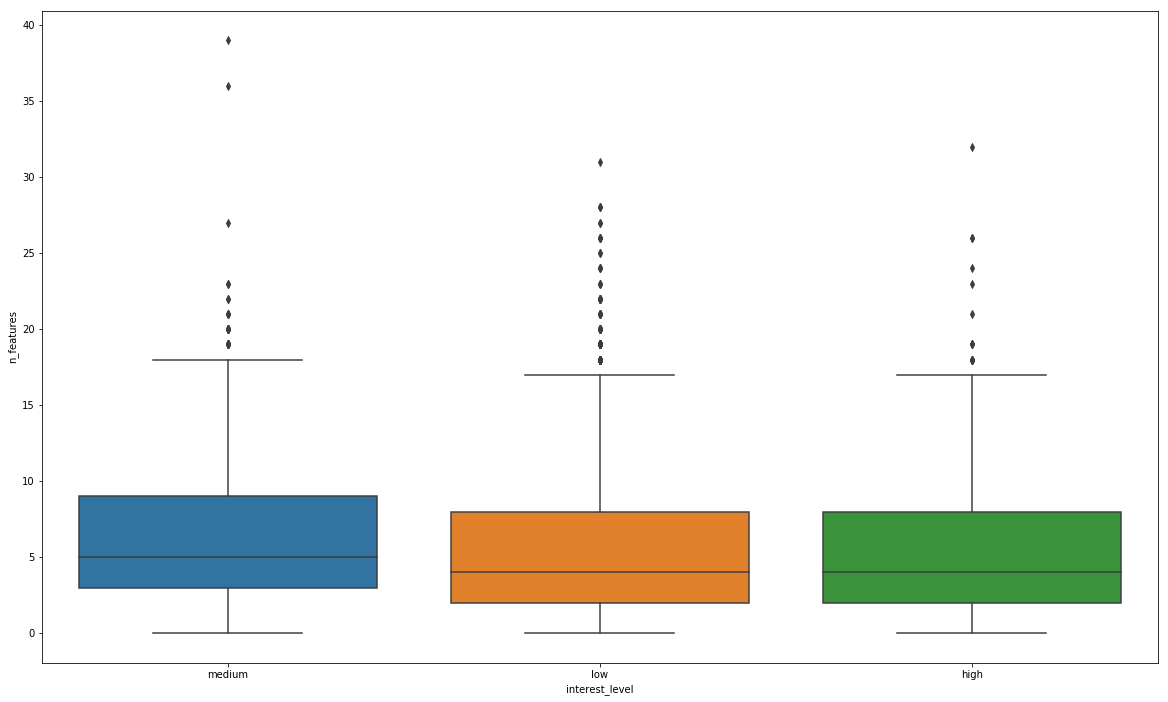

In [402]:
plt.figure(figsize=(20,12))
sns.boxplot(alldata["interest_level"],alldata["n_features"])

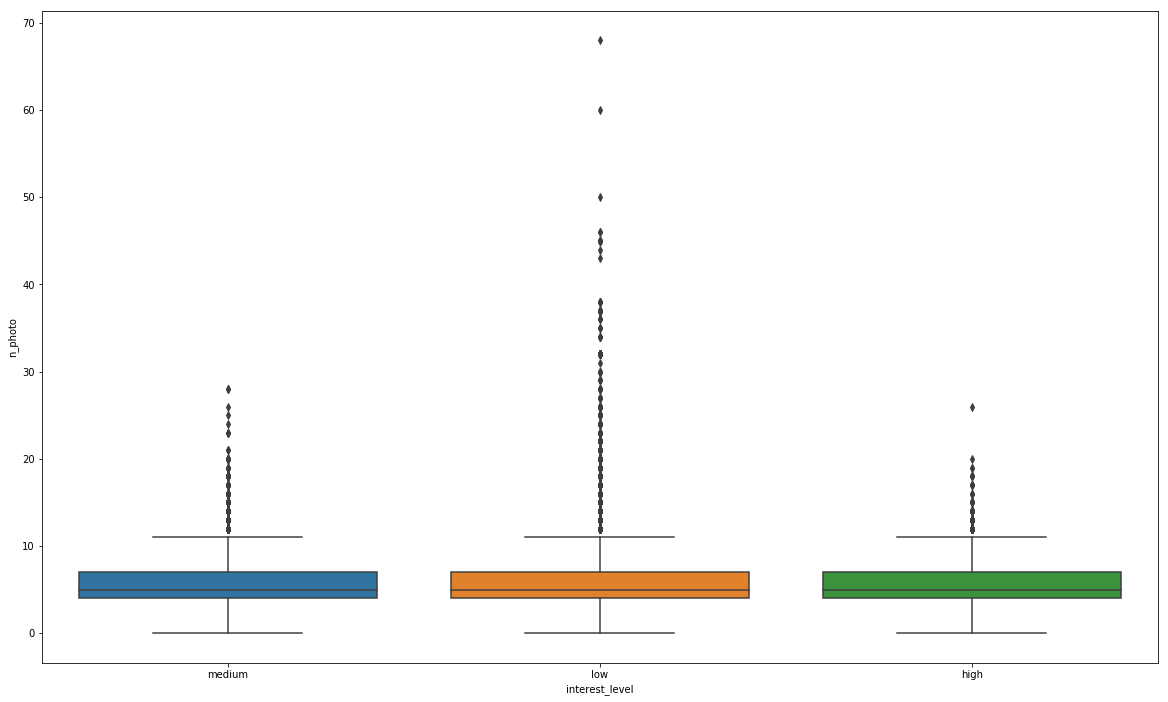

In [403]:
plt.figure(figsize=(20,12))
sns.boxplot(alldata["interest_level"],alldata["n_photo"])

# 사진이 30개를 넘으면 흥미가 떨어진다.

(-1, 14)

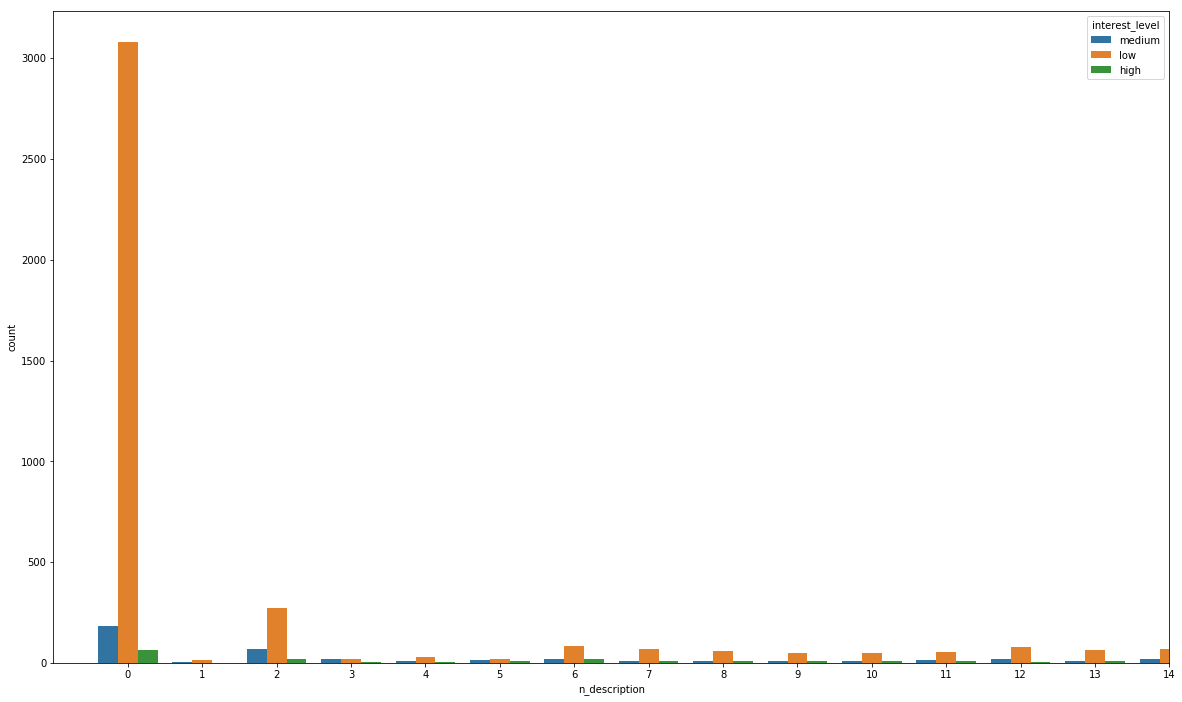

In [404]:
plt.figure(figsize=(20,12))
sns.countplot(alldata["n_description"], hue = alldata["interest_level"] )
plt.xlim(-1,14)

# description이 없으면, 흥미가 엄청낮다.

In [405]:
alldata.head()

,bathrooms,bedrooms,building_id,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,month,day,week,hour,weekday,min,...,"(bathrooms, std)","(bathrooms, median)","(latitude, count)","(latitude, mean)","(latitude, max)","(latitude, min)","(latitude, std)","(latitude, median)","(longitude, count)","(longitude, mean)","(longitude, max)","(longitude, min)","(longitude, std)","(longitude, median)","(listing_id, count)","(listing_id, mean)","(listing_id, max)","(listing_id, min)","(listing_id, std)","(listing_id, median)"
0,1.0,1,6083,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,1887,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,2767,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,3343,medium,6,16,24,5,3,55,...,0.256467,1.0,294,40.708596,40.7679,40.5758,0.050420,40.7113,294,-73.909704,-73.8148,-73.9580,0.040430,-73.91710,294,7.015895e+06,7233385,6813855,116832.612163,7002849.0
1,1.0,2,8417,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,10848,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,2565,[https://photos.renthop.com/2/7092344_7663c19a...,3800,9008,low,6,1,22,5,2,44,...,0.417559,1.0,64,40.749678,40.7963,40.7056,0.022122,40.7513,64,-73.984056,-73.9464,-74.0162,0.017909,-73.98855,64,7.019886e+06,7395263,6834099,116566.526392,7021059.5
2,1.0,2,9344,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,10904,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,3458,[https://photos.renthop.com/2/7158677_c897a134...,3495,16634,medium,6,14,24,15,1,19,...,0.383115,1.0,265,40.752762,40.7884,40.7156,0.014087,40.7528,265,-73.975012,-73.9449,-74.0059,0.011957,-73.97570,265,7.023368e+06,7227235,6815525,120485.954758,7024921.0
3,1.5,3,3797,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,12282,[],40.7145,7211212,-73.9425,1568,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,23484,medium,6,24,25,7,4,54,...,0.305508,1.0,235,40.701596,40.8502,40.6455,0.025991,40.6989,235,-73.950168,-73.8525,-73.9917,0.022847,-73.95320,235,7.031767e+06,7226750,6814711,125976.544428,7050454.0
4,1.0,0,8717,Over-sized Studio w abundant closets. Availabl...,10791,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,790,[https://photos.renthop.com/2/7225292_901f1984...,2795,14705,low,6,28,26,3,1,50,...,0.170195,1.0,135,40.719136,40.8063,40.6824,0.027213,40.7084,135,-73.990982,-73.9449,-74.0180,0.020676,-73.99580,135,7.047819e+06,7225413,6829493,124205.152522,7025465.0


# description, features, photos칼럼 전처리

1. description칼럼은 세부 설명
   아래에서 보듯이, bedroom,bathroom,kitchen...등에 대해 길게 설명하고 있는데,
   bedroom,bathroom같은 것은 이미 데이터셋에 포함되어있고, kitchen,hardwood floor..등도 역시 feature칼럼내에 포함되어 있다.

2. features칼럼은 건물 옵션들을 나타낸다.

3. photos칼럼은 사진의 주소가 나와있다.

결론 

description칼럼은 설명문의 길이(단어 수) 추가 

features칼럼은 자주쓰이는 단어(건물옵션) 추가

photos칼럼에선 포함된 사진의 수 추가

In [406]:
alldata["description"][0]

'Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a  website_redacted '

In [407]:
alldata["features"][0]

['Dining Room',
 'Pre-War',
 'Laundry in Building',
 'Dishwasher',
 'Hardwood Floors',
 'Dogs Allowed',
 'Cats Allowed']

In [408]:
from keras.preprocessing.text import Tokenizer
tk = Tokenizer(filters = "br,/><") # <br>은 html이 그대로 크롤링되어 온것으로 추측, 제거
tk.fit_on_texts(alldata["features"])

tk.word_index

# 단어 종류가 너무 많다 -> 2404개 칼럼이 추가됨 -> 원래 데이터 셋 칼럼이 20~30개인데 너무 많이추가됨 -> 손해
# 자주 나온 것들만 보는 게 효율좋음 -> cv사용

{'elevator': 1,
 'cats allowed': 2,
 'hardwood floors': 3,
 'dogs allowed': 4,
 'doorman': 5,
 'dishwasher': 6,
 'laundry in building': 7,
 'no fee': 8,
 'fitness center': 9,
 'laundry in unit': 10,
 'pre-war': 11,
 'roof deck': 12,
 'outdoor space': 13,
 'dining room': 14,
 'high speed internet': 15,
 'balcony': 16,
 'swimming pool': 17,
 'new construction': 18,
 'terrace': 19,
 'exclusive': 20,
 'loft': 21,
 'garden/patio': 22,
 'prewar': 23,
 'wheelchair access': 24,
 'common outdoor space': 25,
 'hardwood': 26,
 'simplex': 27,
 'fireplace': 28,
 'lowrise': 29,
 'garage': 30,
 'reduced fee': 31,
 'laundry room': 32,
 'furnished': 33,
 'multi-level': 34,
 'high ceilings': 35,
 'private outdoor space': 36,
 'parking space': 37,
 'publicoutdoor': 38,
 'roof-deck': 39,
 'live in super': 40,
 'renovated': 41,
 'pool': 42,
 'on-site laundry': 43,
 'laundry': 44,
 'green building': 45,
 'storage': 46,
 'high ceiling': 47,
 'stainless steel appliances': 48,
 'washer in unit': 49,
 'dryer in

In [409]:
len(tk.word_index)

2404

In [410]:
# feature칼럼의 '리스트' -> '문자열'로 바꾸기

# 빈칸을 언더바(_)로 바꿈 : 단어를 하나로 인식시킴

alldata["features"] = alldata["features"].apply(lambda x: " ".join([i.replace(" ", "_") for i in x]))
alldata["features"][0]

'Dining_Room Pre-War Laundry_in_Building Dishwasher Hardwood_Floors Dogs_Allowed Cats_Allowed'

In [411]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 200, stop_words = "english") # 단어 몇 종류까지 뽑을 것인가 : 많이나온 200개까지
                                                                 # am are is같은 의미없는거 지우기 stop words
alldata_feature = cv.fit_transform(alldata["features"])          # 수정한 features들을 cv로 matrix로만들기
alldata_feature   # 확인

<124011x200 sparse matrix of type '<class 'numpy.int64'>'
	with 701031 stored elements in Compressed Sparse Row format>

In [412]:
from scipy import sparse

alldata = sparse.hstack([alldata_feature, alldata.drop(["description","features","photos","interest_level"],axis=1)] )
        # description,photos,정답값을 제거한 후 수정한 features에 추가
        # matrix형식으로 합쳐주기 위해서 sparse사용 : 대용량은 데이터프레임보다 매트릭스가 좋다

alldata = alldata.tocsr() # csr matrix형식으로 바꾸기

In [413]:
train2 = alldata[:len(train)]
test2 = alldata[len(train):]

In [414]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_jobs = 4, random_state = 1, n_estimators = 30)
# rf.fit(train2, train["interest_level"])
# result = rf.predict_proba(test2)

from catboost import CatBoostClassifier
cat = CatBoostClassifier(n_estimators = 2000)
cat.fit(train2,train["interest_level"])
result = cat.predict_proba(test2)


Learning rate set to 0.053742
0:	learn: 1.0593766	total: 60.9ms	remaining: 2m 1s
1:	learn: 1.0243543	total: 121ms	remaining: 2m 1s
2:	learn: 0.9933085	total: 193ms	remaining: 2m 8s
3:	learn: 0.9654183	total: 255ms	remaining: 2m 7s
4:	learn: 0.9413968	total: 326ms	remaining: 2m 10s
5:	learn: 0.9198714	total: 414ms	remaining: 2m 17s
6:	learn: 0.8996811	total: 492ms	remaining: 2m 20s
7:	learn: 0.8812919	total: 561ms	remaining: 2m 19s
8:	learn: 0.8645180	total: 624ms	remaining: 2m 18s
9:	learn: 0.8495515	total: 688ms	remaining: 2m 16s
10:	learn: 0.8357646	total: 752ms	remaining: 2m 16s
11:	learn: 0.8226566	total: 824ms	remaining: 2m 16s
12:	learn: 0.8113128	total: 882ms	remaining: 2m 14s
13:	learn: 0.8004396	total: 948ms	remaining: 2m 14s
14:	learn: 0.7907159	total: 1.03s	remaining: 2m 16s
15:	learn: 0.7811676	total: 1.1s	remaining: 2m 15s
16:	learn: 0.7727596	total: 1.16s	remaining: 2m 15s
17:	learn: 0.7644395	total: 1.23s	remaining: 2m 15s
18:	learn: 0.7567989	total: 1.3s	remaining: 2m 1

158:	learn: 0.5877913	total: 10.6s	remaining: 2m 2s
159:	learn: 0.5876289	total: 10.6s	remaining: 2m 2s
160:	learn: 0.5872258	total: 10.7s	remaining: 2m 2s
161:	learn: 0.5869248	total: 10.8s	remaining: 2m 1s
162:	learn: 0.5867108	total: 10.8s	remaining: 2m 1s
163:	learn: 0.5865032	total: 10.9s	remaining: 2m 1s
164:	learn: 0.5860295	total: 10.9s	remaining: 2m 1s
165:	learn: 0.5857248	total: 11s	remaining: 2m 1s
166:	learn: 0.5855024	total: 11.1s	remaining: 2m 1s
167:	learn: 0.5852518	total: 11.1s	remaining: 2m 1s
168:	learn: 0.5851217	total: 11.2s	remaining: 2m 1s
169:	learn: 0.5847773	total: 11.2s	remaining: 2m
170:	learn: 0.5845444	total: 11.3s	remaining: 2m
171:	learn: 0.5841808	total: 11.4s	remaining: 2m
172:	learn: 0.5839871	total: 11.4s	remaining: 2m
173:	learn: 0.5838290	total: 11.5s	remaining: 2m
174:	learn: 0.5836789	total: 11.5s	remaining: 2m
175:	learn: 0.5834407	total: 11.6s	remaining: 2m
176:	learn: 0.5831874	total: 11.7s	remaining: 2m
177:	learn: 0.5828723	total: 11.7s	rem

315:	learn: 0.5491522	total: 20.7s	remaining: 1m 50s
316:	learn: 0.5490121	total: 20.7s	remaining: 1m 50s
317:	learn: 0.5488895	total: 20.8s	remaining: 1m 50s
318:	learn: 0.5487531	total: 20.9s	remaining: 1m 50s
319:	learn: 0.5485753	total: 21s	remaining: 1m 49s
320:	learn: 0.5484159	total: 21s	remaining: 1m 49s
321:	learn: 0.5482110	total: 21.1s	remaining: 1m 49s
322:	learn: 0.5479905	total: 21.2s	remaining: 1m 49s
323:	learn: 0.5478433	total: 21.2s	remaining: 1m 49s
324:	learn: 0.5476503	total: 21.3s	remaining: 1m 49s
325:	learn: 0.5474986	total: 21.4s	remaining: 1m 49s
326:	learn: 0.5472776	total: 21.5s	remaining: 1m 49s
327:	learn: 0.5470034	total: 21.6s	remaining: 1m 49s
328:	learn: 0.5468341	total: 21.6s	remaining: 1m 49s
329:	learn: 0.5467100	total: 21.7s	remaining: 1m 49s
330:	learn: 0.5465489	total: 21.8s	remaining: 1m 49s
331:	learn: 0.5463263	total: 21.8s	remaining: 1m 49s
332:	learn: 0.5461279	total: 21.9s	remaining: 1m 49s
333:	learn: 0.5459693	total: 22s	remaining: 1m 49s

473:	learn: 0.5252355	total: 32.3s	remaining: 1m 44s
474:	learn: 0.5251041	total: 32.4s	remaining: 1m 44s
475:	learn: 0.5249643	total: 32.5s	remaining: 1m 43s
476:	learn: 0.5248889	total: 32.5s	remaining: 1m 43s
477:	learn: 0.5247923	total: 32.6s	remaining: 1m 43s
478:	learn: 0.5247104	total: 32.7s	remaining: 1m 43s
479:	learn: 0.5245805	total: 32.8s	remaining: 1m 43s
480:	learn: 0.5244536	total: 32.8s	remaining: 1m 43s
481:	learn: 0.5243445	total: 32.9s	remaining: 1m 43s
482:	learn: 0.5241384	total: 33s	remaining: 1m 43s
483:	learn: 0.5240688	total: 33s	remaining: 1m 43s
484:	learn: 0.5239710	total: 33.1s	remaining: 1m 43s
485:	learn: 0.5238528	total: 33.2s	remaining: 1m 43s
486:	learn: 0.5237172	total: 33.2s	remaining: 1m 43s
487:	learn: 0.5235898	total: 33.3s	remaining: 1m 43s
488:	learn: 0.5234795	total: 33.3s	remaining: 1m 43s
489:	learn: 0.5233621	total: 33.4s	remaining: 1m 42s
490:	learn: 0.5232281	total: 33.5s	remaining: 1m 42s
491:	learn: 0.5231571	total: 33.5s	remaining: 1m 4

630:	learn: 0.5080744	total: 42.1s	remaining: 1m 31s
631:	learn: 0.5079568	total: 42.2s	remaining: 1m 31s
632:	learn: 0.5078790	total: 42.3s	remaining: 1m 31s
633:	learn: 0.5078135	total: 42.3s	remaining: 1m 31s
634:	learn: 0.5076956	total: 42.4s	remaining: 1m 31s
635:	learn: 0.5076057	total: 42.4s	remaining: 1m 31s
636:	learn: 0.5074882	total: 42.5s	remaining: 1m 30s
637:	learn: 0.5073339	total: 42.6s	remaining: 1m 30s
638:	learn: 0.5072464	total: 42.6s	remaining: 1m 30s
639:	learn: 0.5071239	total: 42.7s	remaining: 1m 30s
640:	learn: 0.5070765	total: 42.7s	remaining: 1m 30s
641:	learn: 0.5070001	total: 42.8s	remaining: 1m 30s
642:	learn: 0.5069281	total: 42.9s	remaining: 1m 30s
643:	learn: 0.5068468	total: 42.9s	remaining: 1m 30s
644:	learn: 0.5067686	total: 43s	remaining: 1m 30s
645:	learn: 0.5066881	total: 43s	remaining: 1m 30s
646:	learn: 0.5065745	total: 43.1s	remaining: 1m 30s
647:	learn: 0.5064791	total: 43.2s	remaining: 1m 30s
648:	learn: 0.5063316	total: 43.2s	remaining: 1m 3

789:	learn: 0.4934317	total: 52s	remaining: 1m 19s
790:	learn: 0.4933440	total: 52.1s	remaining: 1m 19s
791:	learn: 0.4932030	total: 52.1s	remaining: 1m 19s
792:	learn: 0.4931073	total: 52.2s	remaining: 1m 19s
793:	learn: 0.4930494	total: 52.3s	remaining: 1m 19s
794:	learn: 0.4929773	total: 52.3s	remaining: 1m 19s
795:	learn: 0.4929003	total: 52.4s	remaining: 1m 19s
796:	learn: 0.4927861	total: 52.4s	remaining: 1m 19s
797:	learn: 0.4927267	total: 52.5s	remaining: 1m 19s
798:	learn: 0.4926589	total: 52.6s	remaining: 1m 19s
799:	learn: 0.4925561	total: 52.6s	remaining: 1m 18s
800:	learn: 0.4924921	total: 52.7s	remaining: 1m 18s
801:	learn: 0.4924408	total: 52.8s	remaining: 1m 18s
802:	learn: 0.4923696	total: 52.8s	remaining: 1m 18s
803:	learn: 0.4922852	total: 52.9s	remaining: 1m 18s
804:	learn: 0.4922052	total: 52.9s	remaining: 1m 18s
805:	learn: 0.4920970	total: 53s	remaining: 1m 18s
806:	learn: 0.4920210	total: 53.1s	remaining: 1m 18s
807:	learn: 0.4919222	total: 53.2s	remaining: 1m 1

947:	learn: 0.4808945	total: 1m 2s	remaining: 1m 9s
948:	learn: 0.4807750	total: 1m 2s	remaining: 1m 9s
949:	learn: 0.4806896	total: 1m 2s	remaining: 1m 9s
950:	learn: 0.4805893	total: 1m 2s	remaining: 1m 8s
951:	learn: 0.4805389	total: 1m 2s	remaining: 1m 8s
952:	learn: 0.4804633	total: 1m 2s	remaining: 1m 8s
953:	learn: 0.4803745	total: 1m 2s	remaining: 1m 8s
954:	learn: 0.4802737	total: 1m 2s	remaining: 1m 8s
955:	learn: 0.4802068	total: 1m 2s	remaining: 1m 8s
956:	learn: 0.4801728	total: 1m 2s	remaining: 1m 8s
957:	learn: 0.4800691	total: 1m 2s	remaining: 1m 8s
958:	learn: 0.4800290	total: 1m 3s	remaining: 1m 8s
959:	learn: 0.4799591	total: 1m 3s	remaining: 1m 8s
960:	learn: 0.4798199	total: 1m 3s	remaining: 1m 8s
961:	learn: 0.4797463	total: 1m 3s	remaining: 1m 8s
962:	learn: 0.4796145	total: 1m 3s	remaining: 1m 8s
963:	learn: 0.4795712	total: 1m 3s	remaining: 1m 8s
964:	learn: 0.4795395	total: 1m 3s	remaining: 1m 8s
965:	learn: 0.4794871	total: 1m 3s	remaining: 1m 7s
966:	learn: 

1105:	learn: 0.4695333	total: 1m 12s	remaining: 58.5s
1106:	learn: 0.4694900	total: 1m 12s	remaining: 58.4s
1107:	learn: 0.4694618	total: 1m 12s	remaining: 58.3s
1108:	learn: 0.4693726	total: 1m 12s	remaining: 58.3s
1109:	learn: 0.4692699	total: 1m 12s	remaining: 58.2s
1110:	learn: 0.4692006	total: 1m 12s	remaining: 58.1s
1111:	learn: 0.4691170	total: 1m 12s	remaining: 58.1s
1112:	learn: 0.4690004	total: 1m 12s	remaining: 58s
1113:	learn: 0.4689540	total: 1m 12s	remaining: 57.9s
1114:	learn: 0.4689052	total: 1m 12s	remaining: 57.9s
1115:	learn: 0.4688318	total: 1m 12s	remaining: 57.8s
1116:	learn: 0.4687275	total: 1m 13s	remaining: 57.7s
1117:	learn: 0.4686487	total: 1m 13s	remaining: 57.7s
1118:	learn: 0.4686149	total: 1m 13s	remaining: 57.6s
1119:	learn: 0.4685405	total: 1m 13s	remaining: 57.5s
1120:	learn: 0.4684630	total: 1m 13s	remaining: 57.5s
1121:	learn: 0.4683935	total: 1m 13s	remaining: 57.4s
1122:	learn: 0.4683341	total: 1m 13s	remaining: 57.3s
1123:	learn: 0.4682548	total: 

1260:	learn: 0.4593328	total: 1m 21s	remaining: 48s
1261:	learn: 0.4592700	total: 1m 21s	remaining: 47.9s
1262:	learn: 0.4592157	total: 1m 22s	remaining: 47.9s
1263:	learn: 0.4591783	total: 1m 22s	remaining: 47.8s
1264:	learn: 0.4590975	total: 1m 22s	remaining: 47.7s
1265:	learn: 0.4590437	total: 1m 22s	remaining: 47.7s
1266:	learn: 0.4589797	total: 1m 22s	remaining: 47.6s
1267:	learn: 0.4589469	total: 1m 22s	remaining: 47.5s
1268:	learn: 0.4589086	total: 1m 22s	remaining: 47.5s
1269:	learn: 0.4588517	total: 1m 22s	remaining: 47.4s
1270:	learn: 0.4587655	total: 1m 22s	remaining: 47.3s
1271:	learn: 0.4587401	total: 1m 22s	remaining: 47.3s
1272:	learn: 0.4587037	total: 1m 22s	remaining: 47.2s
1273:	learn: 0.4586769	total: 1m 22s	remaining: 47.1s
1274:	learn: 0.4586169	total: 1m 22s	remaining: 47.1s
1275:	learn: 0.4585309	total: 1m 22s	remaining: 47s
1276:	learn: 0.4584058	total: 1m 22s	remaining: 46.9s
1277:	learn: 0.4583405	total: 1m 22s	remaining: 46.9s
1278:	learn: 0.4582954	total: 1m

1414:	learn: 0.4498158	total: 1m 31s	remaining: 37.8s
1415:	learn: 0.4497578	total: 1m 31s	remaining: 37.8s
1416:	learn: 0.4496981	total: 1m 31s	remaining: 37.7s
1417:	learn: 0.4495938	total: 1m 31s	remaining: 37.6s
1418:	learn: 0.4495367	total: 1m 31s	remaining: 37.6s
1419:	learn: 0.4494871	total: 1m 31s	remaining: 37.5s
1420:	learn: 0.4494231	total: 1m 31s	remaining: 37.4s
1421:	learn: 0.4493612	total: 1m 31s	remaining: 37.4s
1422:	learn: 0.4493240	total: 1m 32s	remaining: 37.3s
1423:	learn: 0.4492721	total: 1m 32s	remaining: 37.2s
1424:	learn: 0.4492011	total: 1m 32s	remaining: 37.2s
1425:	learn: 0.4490778	total: 1m 32s	remaining: 37.1s
1426:	learn: 0.4489948	total: 1m 32s	remaining: 37s
1427:	learn: 0.4489358	total: 1m 32s	remaining: 37s
1428:	learn: 0.4488554	total: 1m 32s	remaining: 36.9s
1429:	learn: 0.4487883	total: 1m 32s	remaining: 36.8s
1430:	learn: 0.4487573	total: 1m 32s	remaining: 36.8s
1431:	learn: 0.4487003	total: 1m 32s	remaining: 36.7s
1432:	learn: 0.4486495	total: 1m

1567:	learn: 0.4405960	total: 1m 40s	remaining: 27.8s
1568:	learn: 0.4405777	total: 1m 41s	remaining: 27.8s
1569:	learn: 0.4405094	total: 1m 41s	remaining: 27.7s
1570:	learn: 0.4404519	total: 1m 41s	remaining: 27.6s
1571:	learn: 0.4403939	total: 1m 41s	remaining: 27.6s
1572:	learn: 0.4403469	total: 1m 41s	remaining: 27.5s
1573:	learn: 0.4402728	total: 1m 41s	remaining: 27.4s
1574:	learn: 0.4402316	total: 1m 41s	remaining: 27.4s
1575:	learn: 0.4401383	total: 1m 41s	remaining: 27.3s
1576:	learn: 0.4400972	total: 1m 41s	remaining: 27.2s
1577:	learn: 0.4400414	total: 1m 41s	remaining: 27.2s
1578:	learn: 0.4400061	total: 1m 41s	remaining: 27.1s
1579:	learn: 0.4399623	total: 1m 41s	remaining: 27s
1580:	learn: 0.4398519	total: 1m 41s	remaining: 27s
1581:	learn: 0.4398200	total: 1m 41s	remaining: 26.9s
1582:	learn: 0.4397651	total: 1m 41s	remaining: 26.8s
1583:	learn: 0.4396902	total: 1m 41s	remaining: 26.8s
1584:	learn: 0.4396029	total: 1m 42s	remaining: 26.7s
1585:	learn: 0.4395251	total: 1m

1722:	learn: 0.4318153	total: 1m 50s	remaining: 17.8s
1723:	learn: 0.4317396	total: 1m 50s	remaining: 17.7s
1724:	learn: 0.4316708	total: 1m 50s	remaining: 17.7s
1725:	learn: 0.4316230	total: 1m 50s	remaining: 17.6s
1726:	learn: 0.4315647	total: 1m 50s	remaining: 17.5s
1727:	learn: 0.4315166	total: 1m 50s	remaining: 17.5s
1728:	learn: 0.4314752	total: 1m 50s	remaining: 17.4s
1729:	learn: 0.4313999	total: 1m 51s	remaining: 17.3s
1730:	learn: 0.4313250	total: 1m 51s	remaining: 17.3s
1731:	learn: 0.4312759	total: 1m 51s	remaining: 17.2s
1732:	learn: 0.4312277	total: 1m 51s	remaining: 17.1s
1733:	learn: 0.4311613	total: 1m 51s	remaining: 17.1s
1734:	learn: 0.4310992	total: 1m 51s	remaining: 17s
1735:	learn: 0.4310258	total: 1m 51s	remaining: 16.9s
1736:	learn: 0.4309627	total: 1m 51s	remaining: 16.9s
1737:	learn: 0.4308958	total: 1m 51s	remaining: 16.8s
1738:	learn: 0.4308513	total: 1m 51s	remaining: 16.8s
1739:	learn: 0.4308088	total: 1m 51s	remaining: 16.7s
1740:	learn: 0.4307649	total: 

1878:	learn: 0.4229971	total: 2m 1s	remaining: 7.83s
1879:	learn: 0.4229430	total: 2m 1s	remaining: 7.76s
1880:	learn: 0.4228823	total: 2m 1s	remaining: 7.7s
1881:	learn: 0.4228000	total: 2m 1s	remaining: 7.63s
1882:	learn: 0.4227816	total: 2m 1s	remaining: 7.57s
1883:	learn: 0.4227481	total: 2m 1s	remaining: 7.5s
1884:	learn: 0.4226925	total: 2m 1s	remaining: 7.44s
1885:	learn: 0.4226467	total: 2m 1s	remaining: 7.37s
1886:	learn: 0.4225911	total: 2m 2s	remaining: 7.31s
1887:	learn: 0.4225349	total: 2m 2s	remaining: 7.25s
1888:	learn: 0.4224883	total: 2m 2s	remaining: 7.18s
1889:	learn: 0.4223982	total: 2m 2s	remaining: 7.12s
1890:	learn: 0.4223642	total: 2m 2s	remaining: 7.05s
1891:	learn: 0.4223230	total: 2m 2s	remaining: 6.99s
1892:	learn: 0.4222759	total: 2m 2s	remaining: 6.92s
1893:	learn: 0.4221952	total: 2m 2s	remaining: 6.86s
1894:	learn: 0.4221189	total: 2m 2s	remaining: 6.79s
1895:	learn: 0.4220665	total: 2m 2s	remaining: 6.73s
1896:	learn: 0.4219672	total: 2m 2s	remaining: 6

In [415]:
sub = pd.read_csv("/kaggle/input/two-sigma-connect-rental-listing-inquiries/sample_submission.csv.zip")
sub.head()

,listing_id,high,medium,low
0,7142618,0.077788,0.227529,0.694683
1,7210040,0.077788,0.227529,0.694683
2,7174566,0.077788,0.227529,0.694683
3,7191391,0.077788,0.227529,0.694683
4,7171695,0.077788,0.227529,0.694683


In [416]:
sub.iloc[:,1:] = result
sub.head()

,listing_id,high,medium,low
0,7142618,0.089956,0.451857,0.458187
1,7210040,0.041638,0.892473,0.065889
2,7174566,0.007748,0.952989,0.039263
3,7191391,0.254131,0.318523,0.427346
4,7171695,0.016612,0.711249,0.272138


In [417]:
# 제출 시 순서, 알파벳순으로 정렬
sub.columns = ["listing_id","high","low","medium"]
sub.head()

,listing_id,high,low,medium
0,7142618,0.089956,0.451857,0.458187
1,7210040,0.041638,0.892473,0.065889
2,7174566,0.007748,0.952989,0.039263
3,7191391,0.254131,0.318523,0.427346
4,7171695,0.016612,0.711249,0.272138


In [418]:
sub.to_csv("submission.csv", index=False)

In [419]:
# 학습변수중요도 정렬해서 보기
# pd.Series(cat.feature_importances_, index = train2.columns).sort_values(ascending = False)